In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [3]:
data = pd.read_csv('FS_eeg_data.csv')
# Check the first few rows of the dataset to ensure it's loaded correctly
print(data.head())
# Check the columns of the dataset
print(data.columns)

  Condition     Patient  Electrode_1_Feature_Mean  Electrode_1_Feature_Std  \
0        AD   Paciente1                  0.226521                 5.872357   
1        AD  Paciente10                  0.249657                 7.561281   
2        AD  Paciente11                  0.242254                 8.085542   
3        AD  Paciente12                  0.228370                 7.069770   
4        AD  Paciente13                  0.079722                 8.238021   

   Electrode_1_Feature_Skew  Electrode_1_Feature_Kurt  \
0                  0.152169                 -0.058698   
1                 -0.091340                  0.003793   
2                  0.378548                 -0.095307   
3                 -0.307879                  0.362922   
4                  0.006534                 -0.083444   

   Electrode_1_Feature_Mean_First_Diff  Electrode_1_Feature_Mean_Second_Diff  \
0                             2.136645                              2.059910   
1                           

In [4]:
# Check for missing values
print(data.isnull().sum())


Condition                                0
Patient                                  0
Electrode_1_Feature_Mean                 0
Electrode_1_Feature_Std                  0
Electrode_1_Feature_Skew                 0
                                        ..
Electrode_21_Feature_Skew                1
Electrode_21_Feature_Kurt                1
Electrode_21_Feature_Mean_First_Diff     1
Electrode_21_Feature_Mean_Second_Diff    1
Electrode_21_Feature_RMS                 1
Length: 149, dtype: int64


In [5]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Fill missing values only for numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


In [6]:
# Check the column names to identify the target variable
print(data.columns)


Index(['Condition', 'Patient', 'Electrode_1_Feature_Mean',
       'Electrode_1_Feature_Std', 'Electrode_1_Feature_Skew',
       'Electrode_1_Feature_Kurt', 'Electrode_1_Feature_Mean_First_Diff',
       'Electrode_1_Feature_Mean_Second_Diff', 'Electrode_1_Feature_RMS',
       'Electrode_2_Feature_Mean',
       ...
       'Electrode_20_Feature_Mean_First_Diff',
       'Electrode_20_Feature_Mean_Second_Diff', 'Electrode_20_Feature_RMS',
       'Electrode_21_Feature_Mean', 'Electrode_21_Feature_Std',
       'Electrode_21_Feature_Skew', 'Electrode_21_Feature_Kurt',
       'Electrode_21_Feature_Mean_First_Diff',
       'Electrode_21_Feature_Mean_Second_Diff', 'Electrode_21_Feature_RMS'],
      dtype='object', length=149)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Condition' column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Condition'])  # Target column


In [8]:
# Drop 'Patient' and 'Condition' columns from the dataset
X = data.drop(columns=['Patient', 'Condition'])



In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9636363636363636
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.75      0.75      0.75         4

    accuracy                           0.96        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.96      0.96      0.96        55



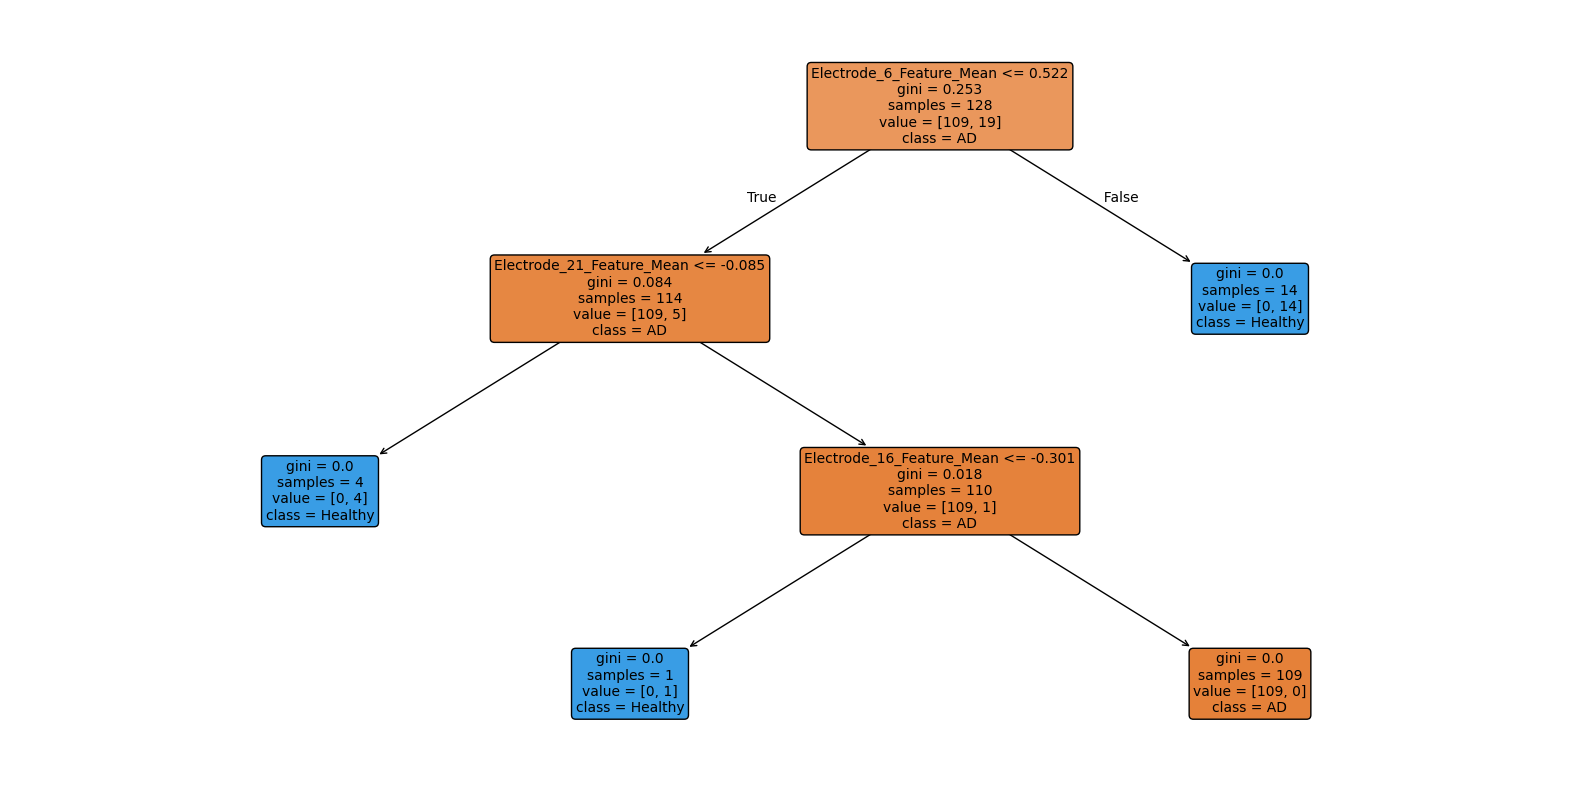

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size to make the plot clearer
plot_tree(clf, 
          feature_names=X.columns,  # Use the feature names from X
          class_names=label_encoder.classes_,  # Use the encoded class names
          filled=True,  # Colors the nodes based on the class they represent
          rounded=True,  # Rounds the edges of the plot
          fontsize=10)  # Font size for readability

plt.show()  # Show the plot


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],               # Splitting criteria
    'max_depth': range(1,10),        # Maximum depth of the tree
}
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print('best hyperparams ' , grid_search.best_params_)
print('best score ' , grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best hyperparams  {'criterion': 'gini', 'max_depth': 3}
best score  0.9458461538461538


In [75]:
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [76]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.9636363636363636
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.75      0.75      0.75         4

    accuracy                           0.96        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.96      0.96      0.96        55



In [77]:
best_tree = grid_search.best_estimator_


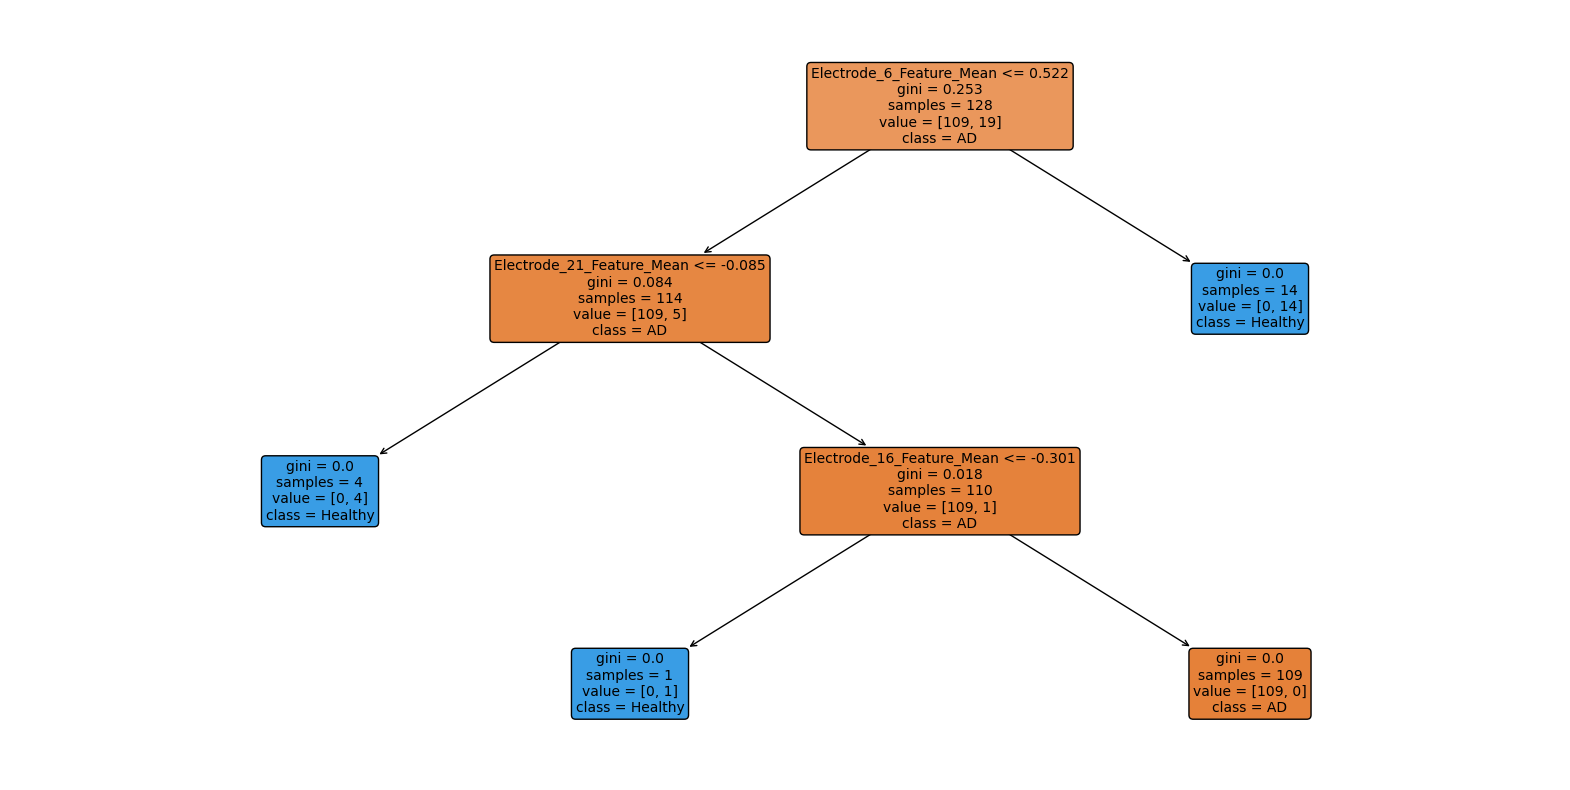

In [78]:
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(best_tree, 
          feature_names=X_train.columns,  # Feature names
          class_names=['AD', 'Healthy'],  # Class names
          filled=True,  # Color nodes based on classification
          rounded=True,  # Make nodes rounded
          fontsize=10)  # Adjust font size for readability
plt.show()


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [80]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [81]:
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [82]:
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [83]:
y_pred_rf = rf_clf.predict(X_test)


In [84]:
# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Detailed classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9818181818181818
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.75      0.86         4

    accuracy                           0.98        55
   macro avg       0.99      0.88      0.92        55
weighted avg       0.98      0.98      0.98        55



In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [89]:
cm = confusion_matrix(y_test, y_pred_rf)


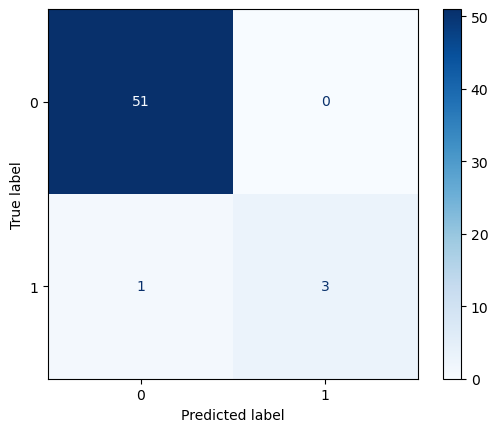

In [90]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
